<a href="https://colab.research.google.com/github/njokinjuguna/Machine-learning-Models/blob/main/cancerpredictiveanalysisinkenya.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Cancer Predictive Analysis in Kenya**

##** Merging the 2 data sets and cleaning**

Province_mapping 0      Eastern/N Eastern
1                Central
2                Central
3                Western
4      Eastern/N Eastern
             ...        
995          Rift Valley
996          Rift Valley
997          Rift Valley
998              Western
999          Rift Valley
Name: Province, Length: 1000, dtype: object
Updated 'Breast cancer' column for MTRH records.
Standardized 'Referral' column for MTRH records to contain 0 and 1 only.
Updated 'OTHERS' column for MTRH records to replace 'yes'/'Yes' with 1.
Unique values in 'Sex' after cleaning: ['M' 'F']
Number of NaN values in 'Specify': Specify    965
Specify    934
dtype: int64
Unique values in column 2008: [1 0]
Unique values in column 2009: [0 1]
Unique values in column 2010: [0 1]
Unique values in column 2011: [0 1]
Unique values in column 2012: [0 1]
  PatientID Hospital  Age Sex      Residence           Province Referral  \
0  A001_KNH      KNH   67   M  Tharaka nithi  Eastern/N Eastern        0   
1  A002_KNH

<ipython-input-100-1070f9e9062d>:70: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  combined_df[column] = combined_df[column].fillna(0)  # Replace NaN with 0
<ipython-input-100-1070f9e9062d>:96: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  combined_df.loc[mtrh_mask, 'Referral'] = combined_df.loc[mtrh_mask, 'Referral'].replace(
<ipython-input-100-1070f9e9062d>:99: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in 

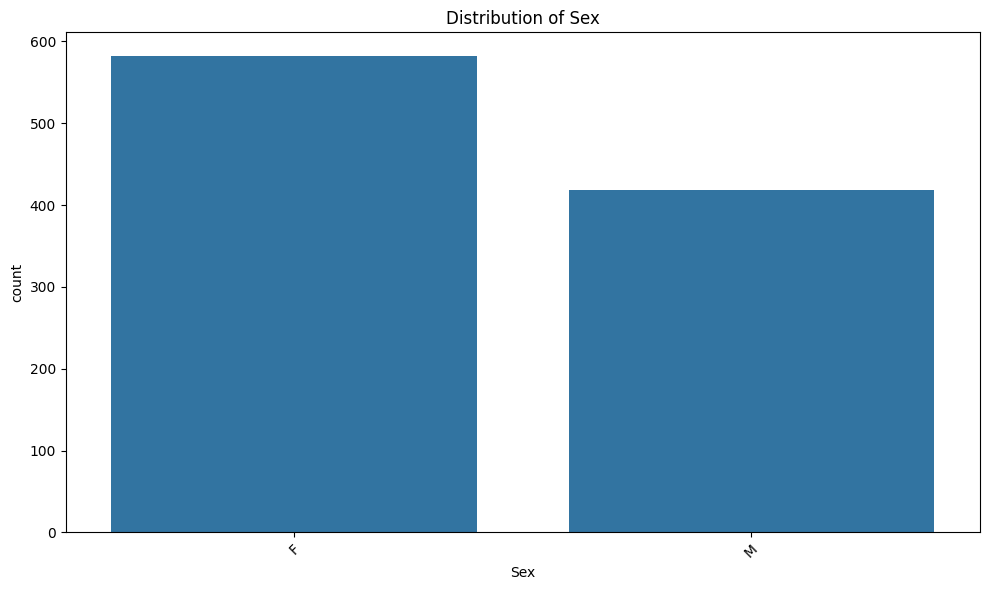

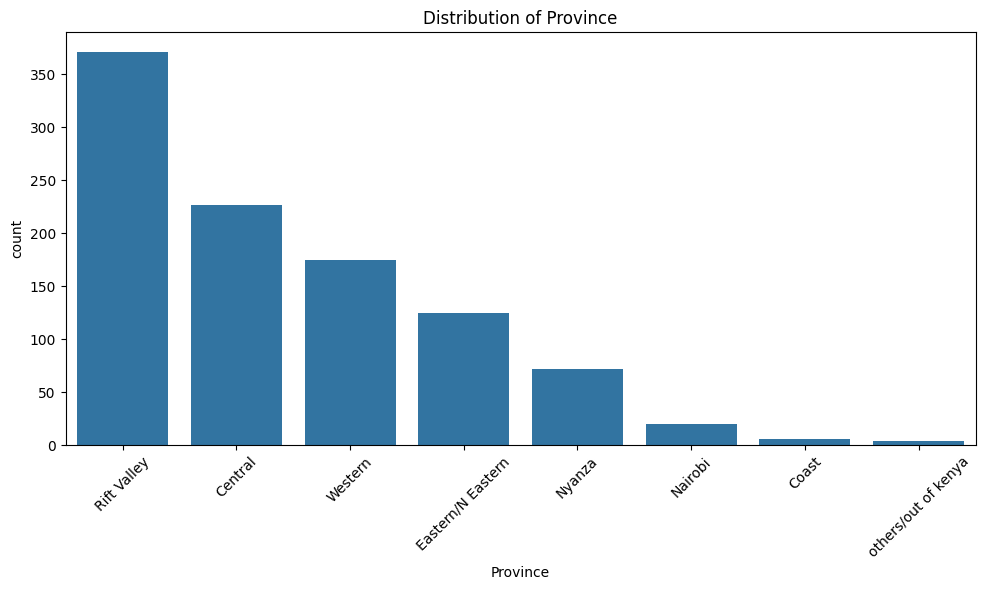

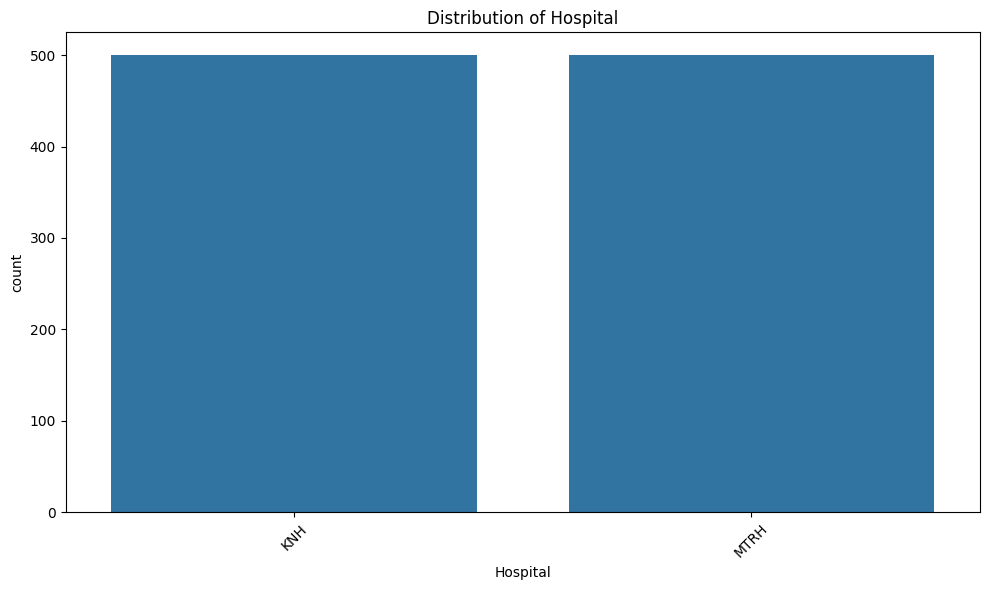

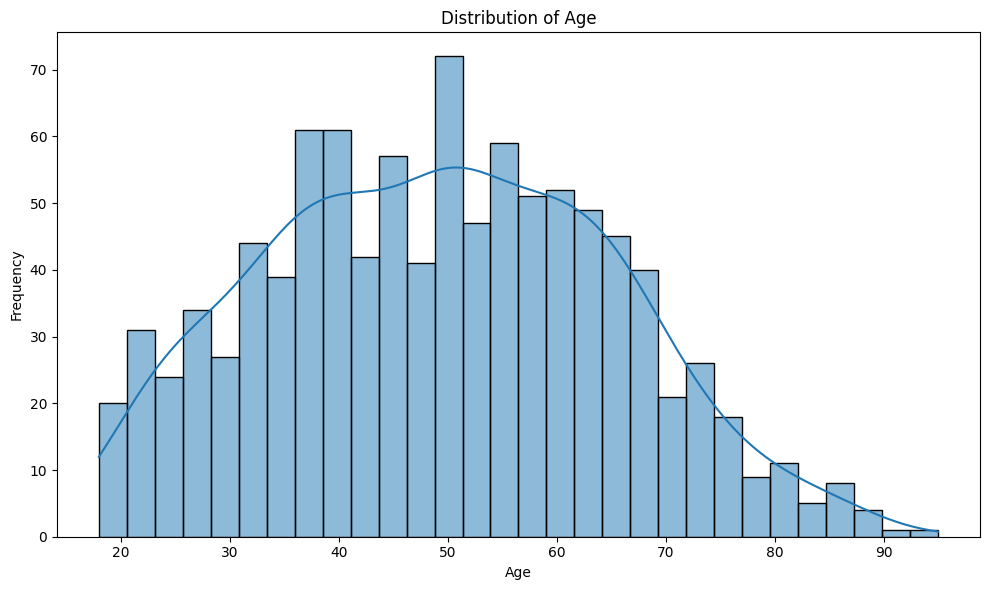

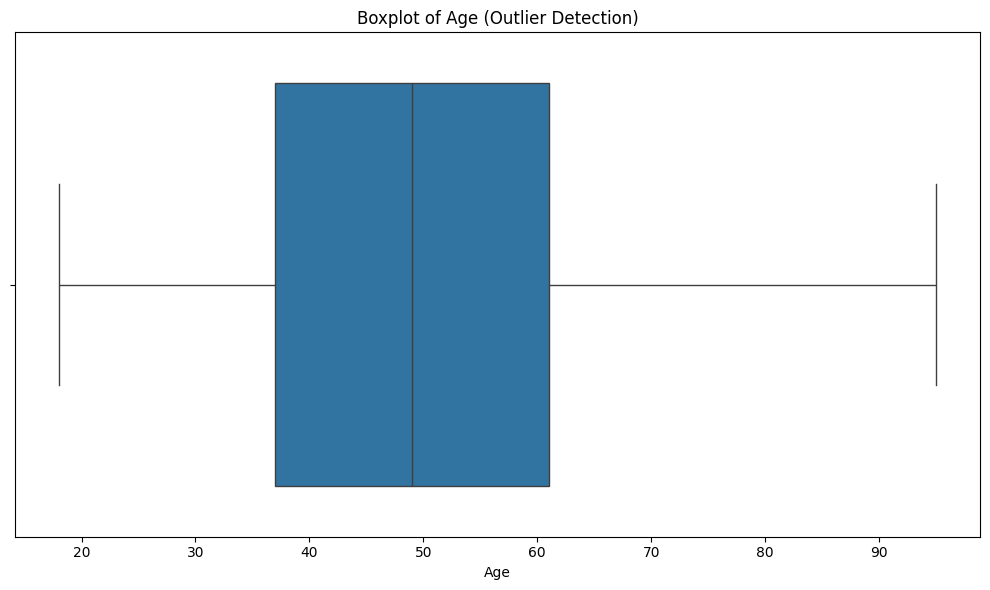

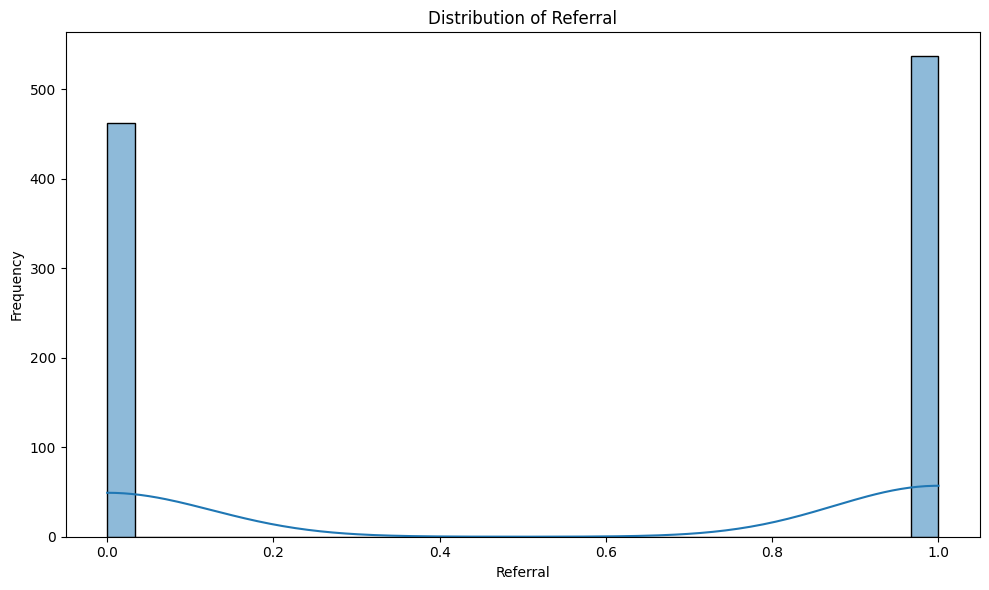

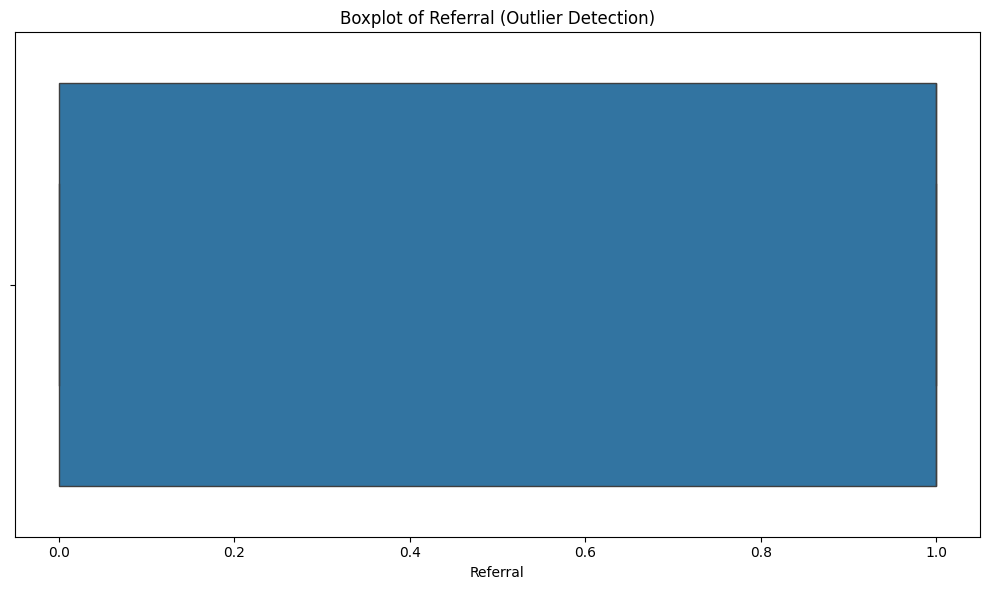

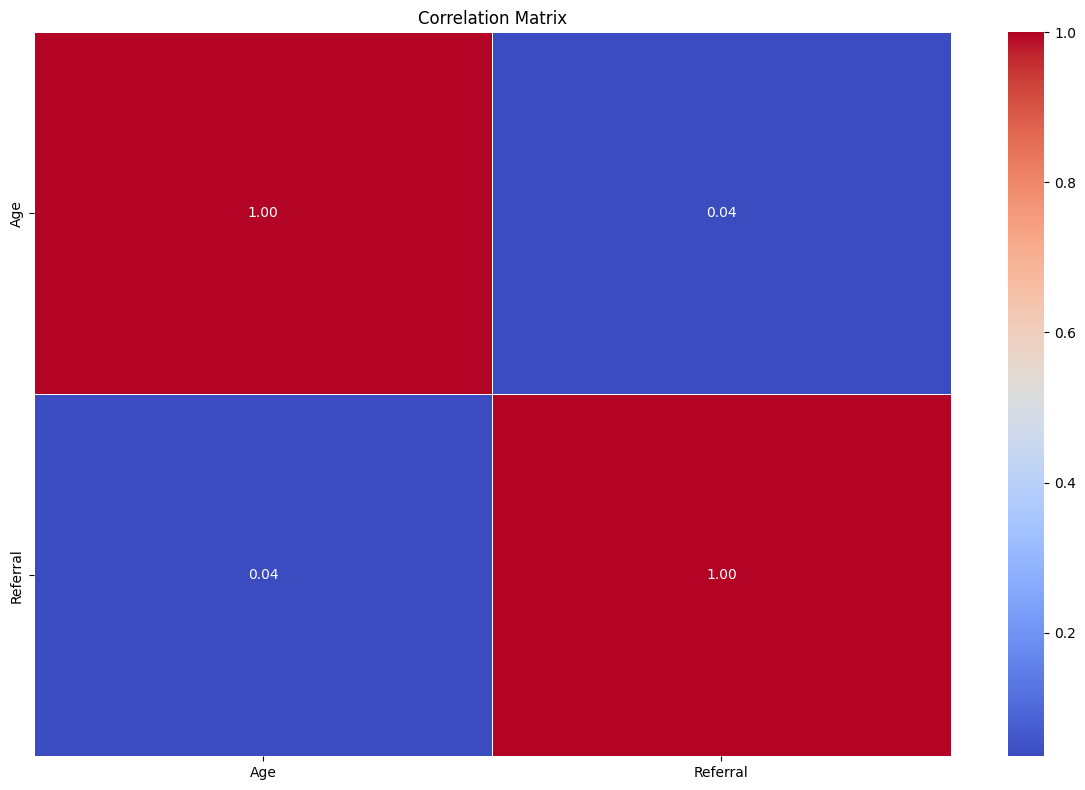

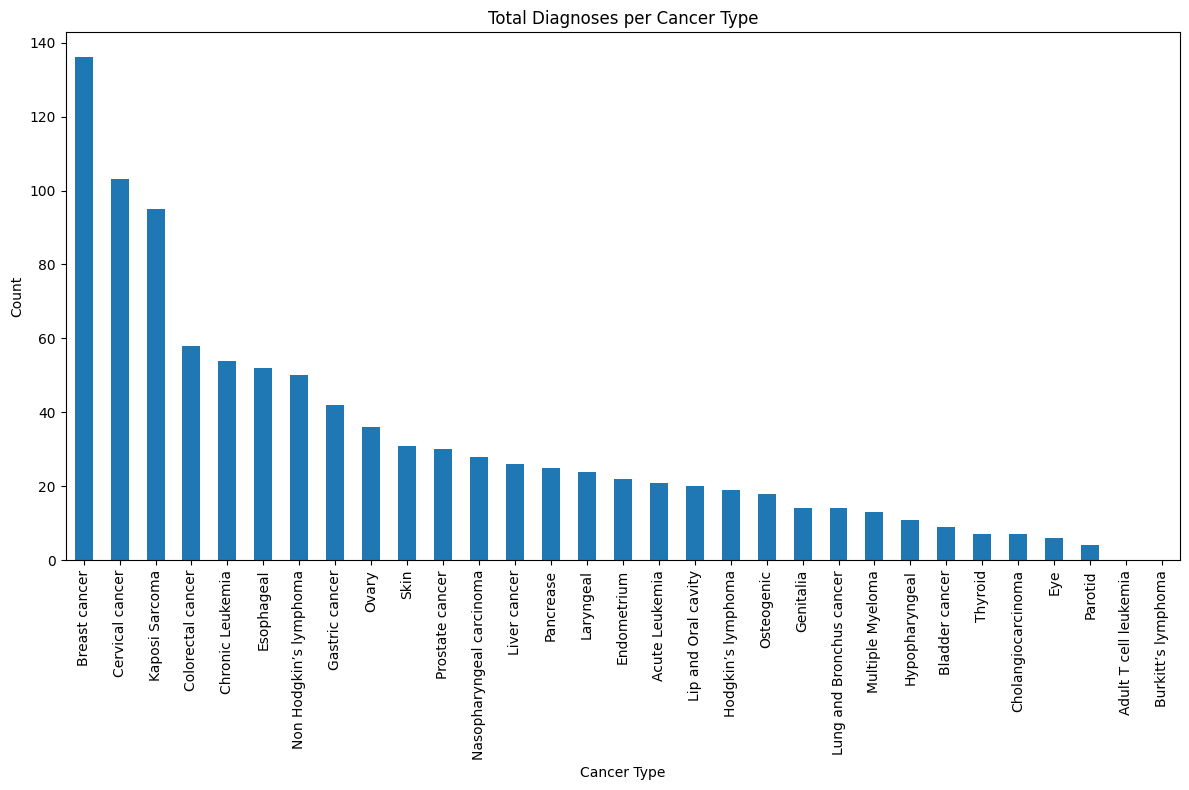

     PatientID Hospital  Age Sex      Residence           Province Referral  \
0     A001_KNH      KNH   67   M  Tharaka nithi  Eastern/N Eastern        0   
1     A002_KNH      KNH   31   M          nyeri            Central        0   
2     A003_KNH      KNH   62   M      kirinyaga            Central        1   
3     A004_KNH      KNH   25   M          kisii            Western        0   
4     A005_KNH      KNH   29   M       machakos  Eastern/N Eastern        1   
..         ...      ...  ...  ..            ...                ...      ...   
995  B150_MTRH     MTRH   18   F    UASIN GISHU        Rift Valley        0   
996  B151_MTRH     MTRH   25   F    UASIN GISHU        Rift Valley        1   
997  B152_MTRH     MTRH   50   F    UASIN GISHU        Rift Valley        1   
998  B153_MTRH     MTRH   44   F        BUNGOMA            Western        1   
999  B154_MTRH     MTRH   36   M          NANDI        Rift Valley        1   

          Referred From  Gastric cancer  Breast can

In [100]:
import pandas as pd

# Paths to the two files
file1_path = 'KNH_Data.xlsx'  # Replace with the actual path to the KNH file
file2_path = 'MTRH_Data.xlsx'  # Replace with the actual path to the MTRH file

# Load each file's 'Cleaned DB' sheet into DataFrames
df1 = pd.read_excel(file1_path, sheet_name='Cleaned DB')
df2 = pd.read_excel(file2_path, sheet_name='Cleaned DB')


# Standardizing column names in KNH to match MTRH
column_names_mtrh = df2.columns.tolist()  # Getting column names from MTRH
df1.columns = column_names_mtrh  # Applying these column names to KNH

# Concatenate the two DataFrames after standardizing column names
combined_df = pd.concat([df1, df2], ignore_index=True)

# Strip any leading or trailing whitespace in column names
combined_df.columns = combined_df.columns.str.strip()

# Rename the last five columns explicitly to 2008 through 2012
combined_df.columns.values[-5:] = [2008, 2009, 2010, 2011, 2012]



# Rename "Questionnaire No" to "PatientID"
combined_df.rename(columns={"Questionnaire No": "PatientID"}, inplace=True)

# Make "PatientID" unique by appending the "Hospital" name
combined_df["PatientID"] = combined_df["PatientID"].astype(str) + "_" + combined_df["Site"]

# Rename "Site" to "Hospital"
combined_df.rename(columns={"Site": "Hospital"}, inplace=True)

# Load the 'Coding' sheet from the KNH workbook to get the region mappings
coding_df = pd.read_excel(file1_path, sheet_name='Coding')

# Extract the regions and their codes from 'Unnamed: 14'
# Ensure the extraction aligns properly with the intended rows and codes

region_names = coding_df['Unnamed: 14'].iloc[1:9].values  # Extract the specific rows with region names
# Create the mapping dictionary for region codes and names
region_codes = coding_df['Unnamed: 13'].iloc[1:9].values
province_mapping = dict(zip(region_codes, region_names))

# Map the 'Province' column in the combined DataFrame using the province_mapping
combined_df['Province'] = combined_df['Province'].map(province_mapping)
print('Province_mapping',combined_df['Province'] )

# Ensure "Breast cancer" column exists
if 'Breast cancer' in combined_df.columns:
    # Update records for MTRH (filter by 'Hospital' == 'MTRH')
    mtrh_mask = combined_df['Hospital'] == 'MTRH'
    combined_df.loc[mtrh_mask, 'Breast cancer'] = combined_df.loc[mtrh_mask, 'Breast cancer'].apply(
        lambda x: 0 if pd.isna(x) or str(x).strip() == "" else 1  # Blank/NaN = 0, any non-blank = 1
    )
    print("Updated 'Breast cancer' column for MTRH records.")
else:
    print("'Breast cancer' column not found in the DataFrame.")

# # Print all column names to verify the actual name of the 'Breast cancer' column
# print("Column names in the DataFrame:", combined_df.columns.tolist())

# Define the range of cancer columns to process
cancer_columns = combined_df.loc[:, 'Gastric cancer':'Multiple Myeloma'].columns

# Replace NaN with 0 and 'yes'/'Yes' (case-insensitive) with 1 in cancer columns
for column in cancer_columns:
    combined_df[column] = combined_df[column].fillna(0)  # Replace NaN with 0
    combined_df[column] = combined_df[column].apply(lambda x: 1 if x != 0 else 0)  # Replace any non-0 with 1

# Clean the 'OTHERS' column (column 'AN')
combined_df['OTHERS'] = combined_df['OTHERS'].fillna(0)  # Replace NaN with 0
combined_df[column] = combined_df[column].apply(lambda x: 1 if x != 0 else 0)  # Replace any non-0 with 1

# Define the range of cancer checking method columns (AP-AY)
method_columns = combined_df.loc[:, 'Method_Biopsy':'Mammogram'].columns

# Replace NaN with 0 and all other values with 1 in method columns
for column in method_columns:
    combined_df[column] = combined_df[column].fillna(0)  # Replace NaN with 0
    combined_df[column] = combined_df[column].apply(lambda x: 1 if x != 0 else 0)  # Replace any non-0 with 1

# Clean the 'others' column (AZ)
combined_df['others'] = combined_df['others'].fillna(0)  # Replace NaN with 0
combined_df['others'] = combined_df['others'].apply(lambda x: 1 if x != 0 else 0)  # Replace any non-0 with 1

# Ensure "Referral" column exists
if 'Referral' in combined_df.columns:
    # Create a mask for MTRH Referral column records
    mtrh_mask = combined_df['Hospital'] == 'MTRH'

    # Standardize the "Referral" column for MTRH records
    combined_df.loc[mtrh_mask, 'Referral'] = combined_df.loc[mtrh_mask, 'Referral'].str.strip().str.lower()  # Normalize text
    combined_df.loc[mtrh_mask, 'Referral'] = combined_df.loc[mtrh_mask, 'Referral'].replace(
        {'yes': 1, 'no': 0, '': 0, None: 0}  # Map values
    )
    combined_df.loc[mtrh_mask, 'Referral'] = combined_df.loc[mtrh_mask, 'Referral'].fillna(0).astype(int)  # Ensure numeric type
    print("Standardized 'Referral' column for MTRH records to contain 0 and 1 only.")
else:
    print("'Referral' column not found in the DataFrame.")

# Ensure the 'OTHERS' column exists
if 'OTHERS' in combined_df.columns:
    # Apply the condition where 'Hospital' is 'MTRH' and replace 'yes'/'Yes' with 1
    mtrh_mask = combined_df['Hospital'] == 'MTRH'
    combined_df.loc[mtrh_mask, 'OTHERS'] = combined_df.loc[mtrh_mask, 'OTHERS'].apply(
        lambda x: 1 if str(x).strip().lower() == 'yes' else x
    )
    print("Updated 'OTHERS' column for MTRH records to replace 'yes'/'Yes' with 1.")
else:
    print("'OTHERS' column not found in the DataFrame.")

# Fix trailing spaces in 'Sex' column
combined_df['Sex'] = combined_df['Sex'].str.strip()

# Verify the unique values in 'Sex'
print(f"Unique values in 'Sex' after cleaning: {combined_df['Sex'].unique()}")

# Handle the 'Specify' column (leave NaN as is, since it is valid based on domain knowledge)
print(f"Number of NaN values in 'Specify': {combined_df['Specify'].isna().sum()}")

# Standardize `2008-2012` columns: Replace NaN with 0 and anything else (e.g., 'yes', 'Yes') with 1
for year in range(2008, 2013):
    combined_df[year] = combined_df[year].apply(lambda x: 0 if pd.isna(x) else 1)

# Verify the unique values in `2008-2012` columns
for year in range(2008, 2013):
    print(f"Unique values in column {year}: {combined_df[year].unique()}")

# Validate the changes
print(combined_df.head())


# Validate Categorical Columns
categorical_columns = ['Sex', 'Province', 'Hospital']
for column in categorical_columns:
    print(f"Unique values in '{column}':")
    print(combined_df[column].unique(), "\n")

# Validate Numerical Columns
numerical_columns = ['Age', 'Referral']
for column in numerical_columns:
    print(f"Summary statistics for '{column}':")
    print(combined_df[column].describe(), "\n")

    # Check for outliers
    print(f"Outliers in '{column}':")
    print(combined_df[(combined_df[column] < 0) | (combined_df[column] > 100)])  # Adjust range as needed
    print("\n")
#*********************************************visualization of the cleaned dataset*********************************
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize categorical columns
def visualize_categorical_columns(df, categorical_columns):
    for column in categorical_columns:
        plt.figure(figsize=(10, 6))
        sns.countplot(data=df, x=column, order=df[column].value_counts().index)
        plt.title(f"Distribution of {column}")
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

# Visualize numerical columns
def visualize_numerical_columns(df, numerical_columns):
    for column in numerical_columns:
        plt.figure(figsize=(10, 6))
        sns.histplot(data=df, x=column, kde=True, bins=30)
        plt.title(f"Distribution of {column}")
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.tight_layout()
        plt.show()

        # Boxplot to detect outliers
        plt.figure(figsize=(10, 6))
        sns.boxplot(data=df, x=column)
        plt.title(f"Boxplot of {column} (Outlier Detection)")
        plt.tight_layout()
        plt.show()

# Correlation matrix heatmap for numerical columns
def visualize_correlation_matrix(df, numerical_columns):
    plt.figure(figsize=(12, 8))
    correlation_matrix = df[numerical_columns].corr()
    sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
    plt.title("Correlation Matrix")
    plt.tight_layout()
    plt.show()

# Bar plot for cancer diagnosis counts
def visualize_cancer_diagnosis_counts(df, cancer_columns):
    cancer_counts = df[cancer_columns].sum()
    plt.figure(figsize=(12, 8))
    cancer_counts.sort_values(ascending=False).plot(kind='bar')
    plt.title("Total Diagnoses per Cancer Type")
    plt.xlabel("Cancer Type")
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()

# Execute the visualization functions
categorical_columns = ['Sex', 'Province', 'Hospital']
numerical_columns = ['Age', 'Referral']
cancer_columns = combined_df.loc[:, 'Gastric cancer':'Multiple Myeloma'].columns

# Visualize distributions for categorical and numerical columns
visualize_categorical_columns(combined_df, categorical_columns)
visualize_numerical_columns(combined_df, numerical_columns)

# Correlation matrix for numerical columns
visualize_correlation_matrix(combined_df, numerical_columns)

# Visualize total diagnoses for each cancer type
visualize_cancer_diagnosis_counts(combined_df, cancer_columns)


#***********************************************Save cleaned dataset****************************************************************
print(combined_df)
# Save the combined DataFrame to a new Excel file
output_path = 'Test_semiFinale.xlsx'
combined_df.to_excel(output_path, index=False)
print(f"Combined dataset with standardized columns saved to {output_path}")


## **Distribution of Key Features**

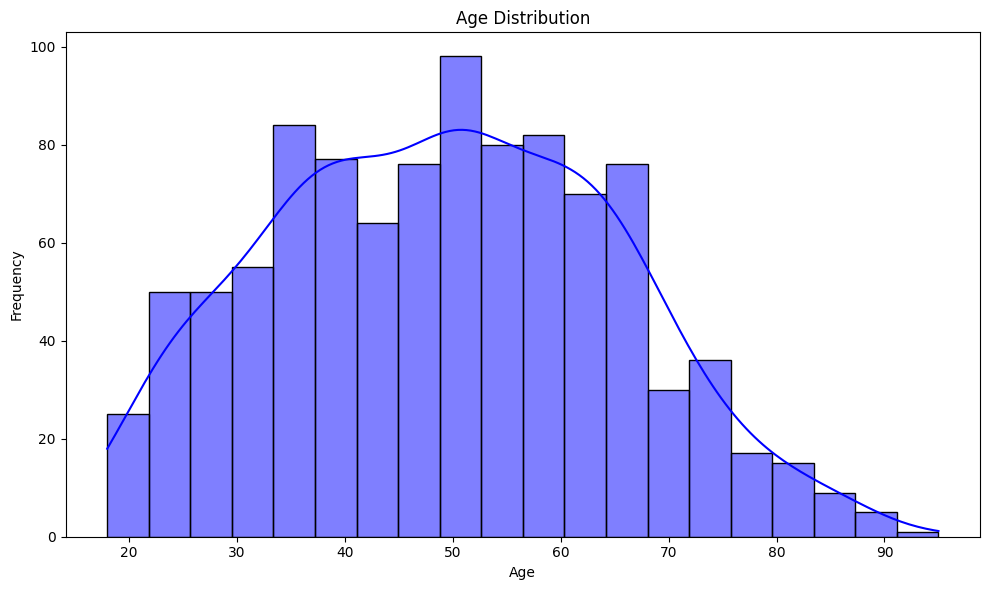

<ipython-input-101-991a199be736>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=combined_df, x='Sex', palette='viridis')


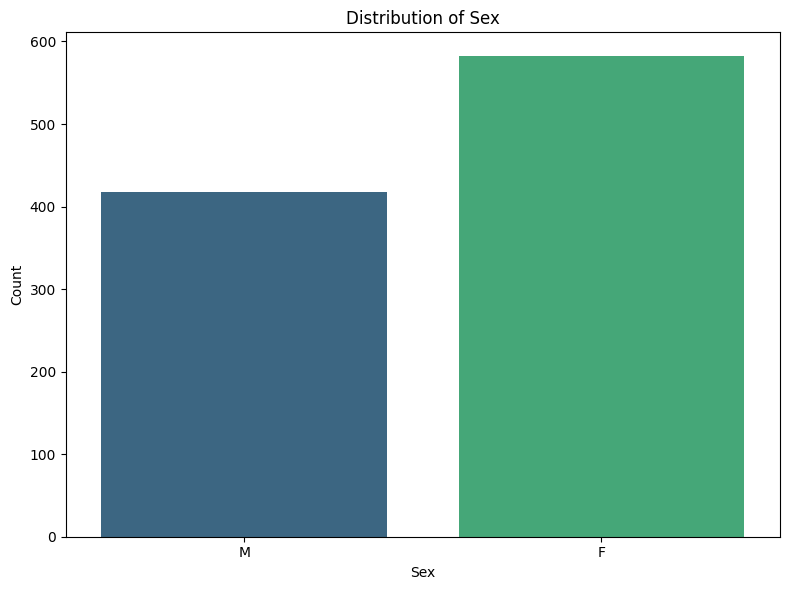

<ipython-input-101-991a199be736>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=combined_df, y='Province', order=combined_df['Province'].value_counts().index, palette='mako')


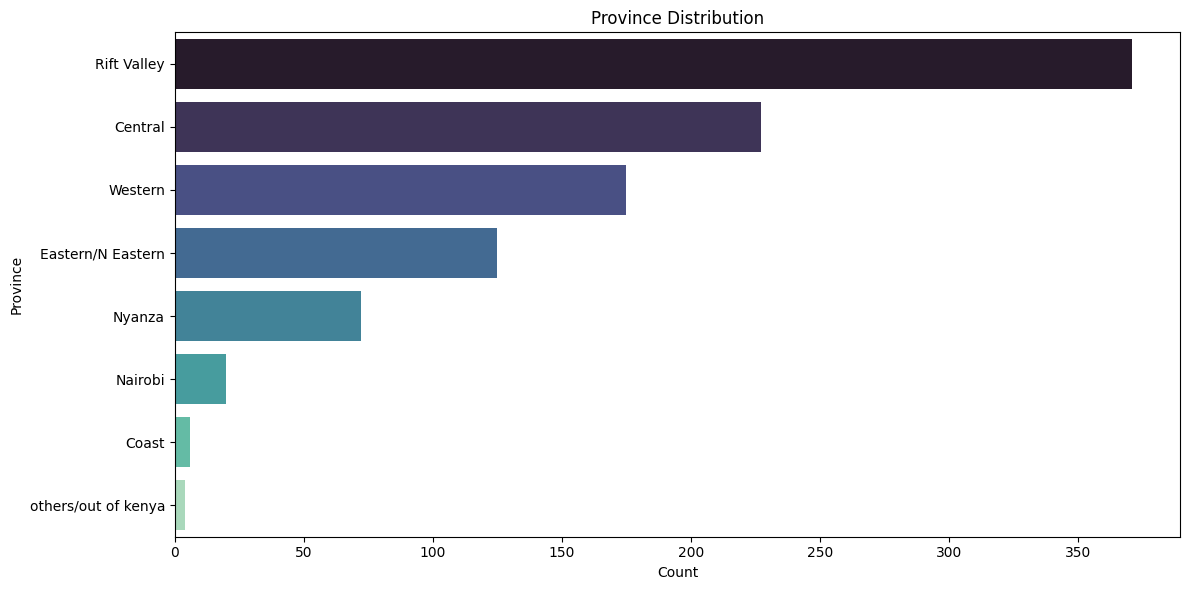

In [101]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of Age
plt.figure(figsize=(10, 6))
sns.histplot(combined_df['Age'], kde=True, bins=20, color='blue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Distribution of Sex
plt.figure(figsize=(8, 6))
sns.countplot(data=combined_df, x='Sex', palette='viridis')
plt.title('Distribution of Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

# Distribution of Province
plt.figure(figsize=(12, 6))
sns.countplot(data=combined_df, y='Province', order=combined_df['Province'].value_counts().index, palette='mako')
plt.title('Province Distribution')
plt.xlabel('Count')
plt.ylabel('Province')
plt.tight_layout()
plt.show()


## **Cancer Prevalence**

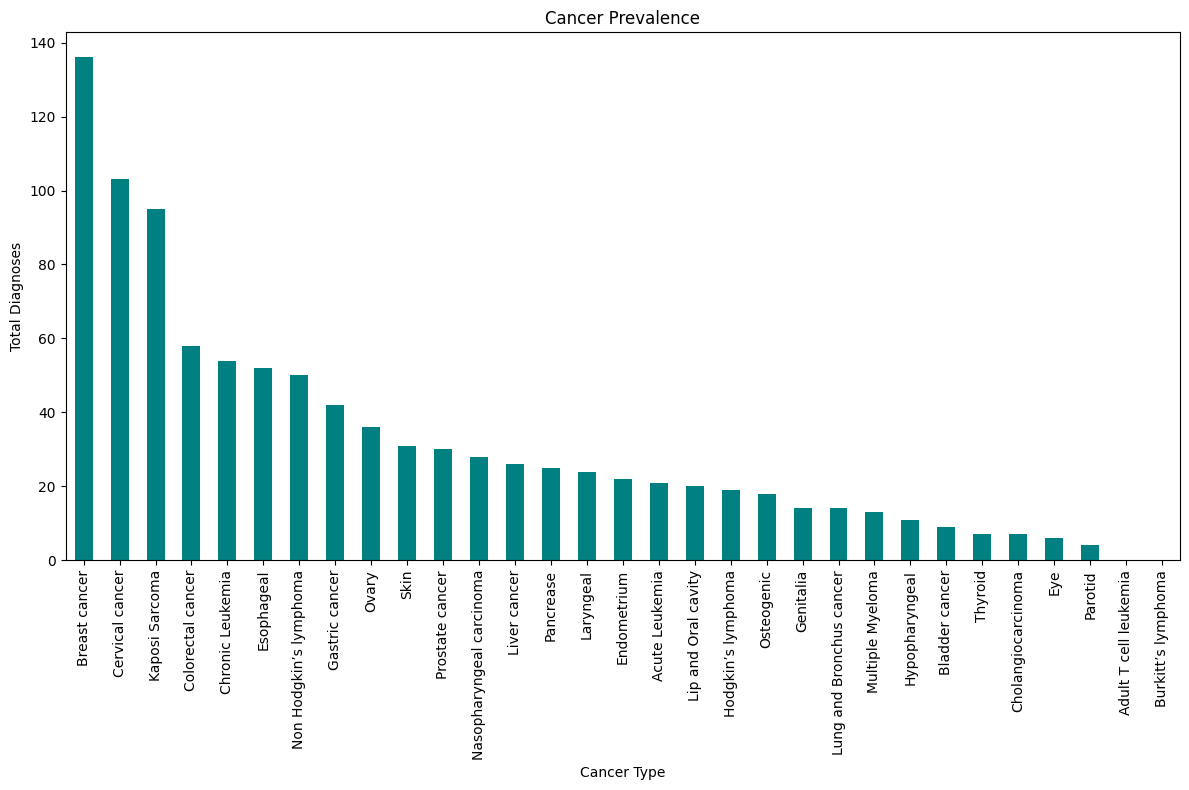

In [102]:
# Sum of all cancer diagnoses
cancer_columns = combined_df.loc[:, 'Gastric cancer':'Multiple Myeloma'].columns
cancer_totals = combined_df[cancer_columns].sum().sort_values(ascending=False)

# Bar plot for cancer prevalence
plt.figure(figsize=(12, 8))
cancer_totals.plot(kind='bar', color='teal')
plt.title('Cancer Prevalence')
plt.xlabel('Cancer Type')
plt.ylabel('Total Diagnoses')
plt.tight_layout()
plt.show()


## **Age vs. Cancer Diagnoses**

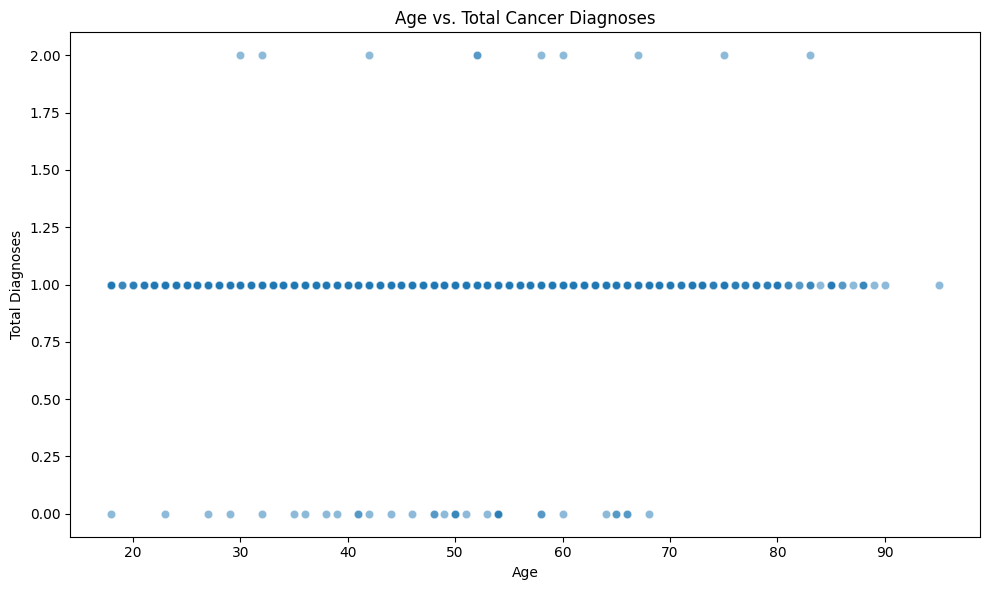

In [103]:
# Plot Age against the total number of cancer diagnoses per patient
combined_df['Total_Cancers'] = combined_df[cancer_columns].sum(axis=1)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=combined_df, x='Age', y='Total_Cancers', alpha=0.5)
plt.title('Age vs. Total Cancer Diagnoses')
plt.xlabel('Age')
plt.ylabel('Total Diagnoses')
plt.tight_layout()
plt.show()


## **Hospital-Specific Insights**

<ipython-input-104-a20a032cabfc>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=combined_df, x='Hospital', y='Total_Cancers', palette='Set2')


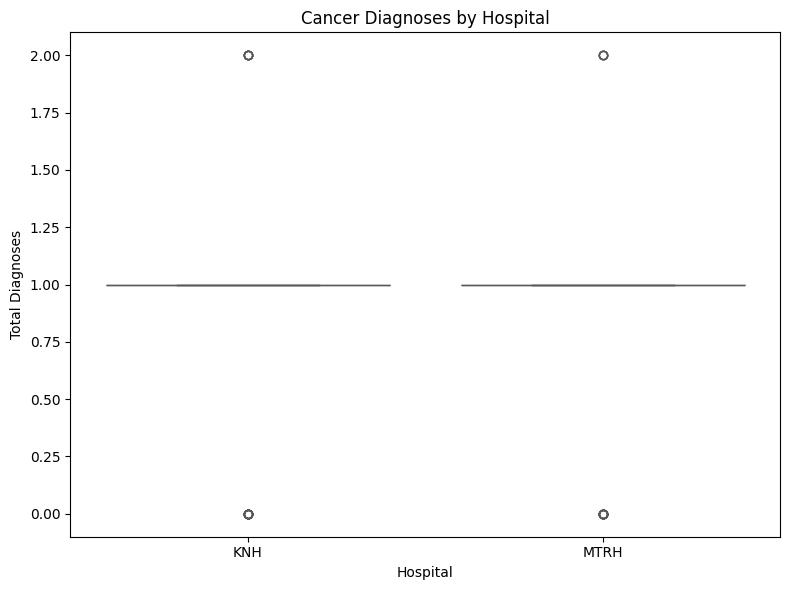

In [104]:
# Distribution of total cancer diagnoses by Hospital
plt.figure(figsize=(8, 6))
sns.boxplot(data=combined_df, x='Hospital', y='Total_Cancers', palette='Set2')
plt.title('Cancer Diagnoses by Hospital')
plt.xlabel('Hospital')
plt.ylabel('Total Diagnoses')
plt.tight_layout()
plt.show()


## **Statistical Correlation Analysis**

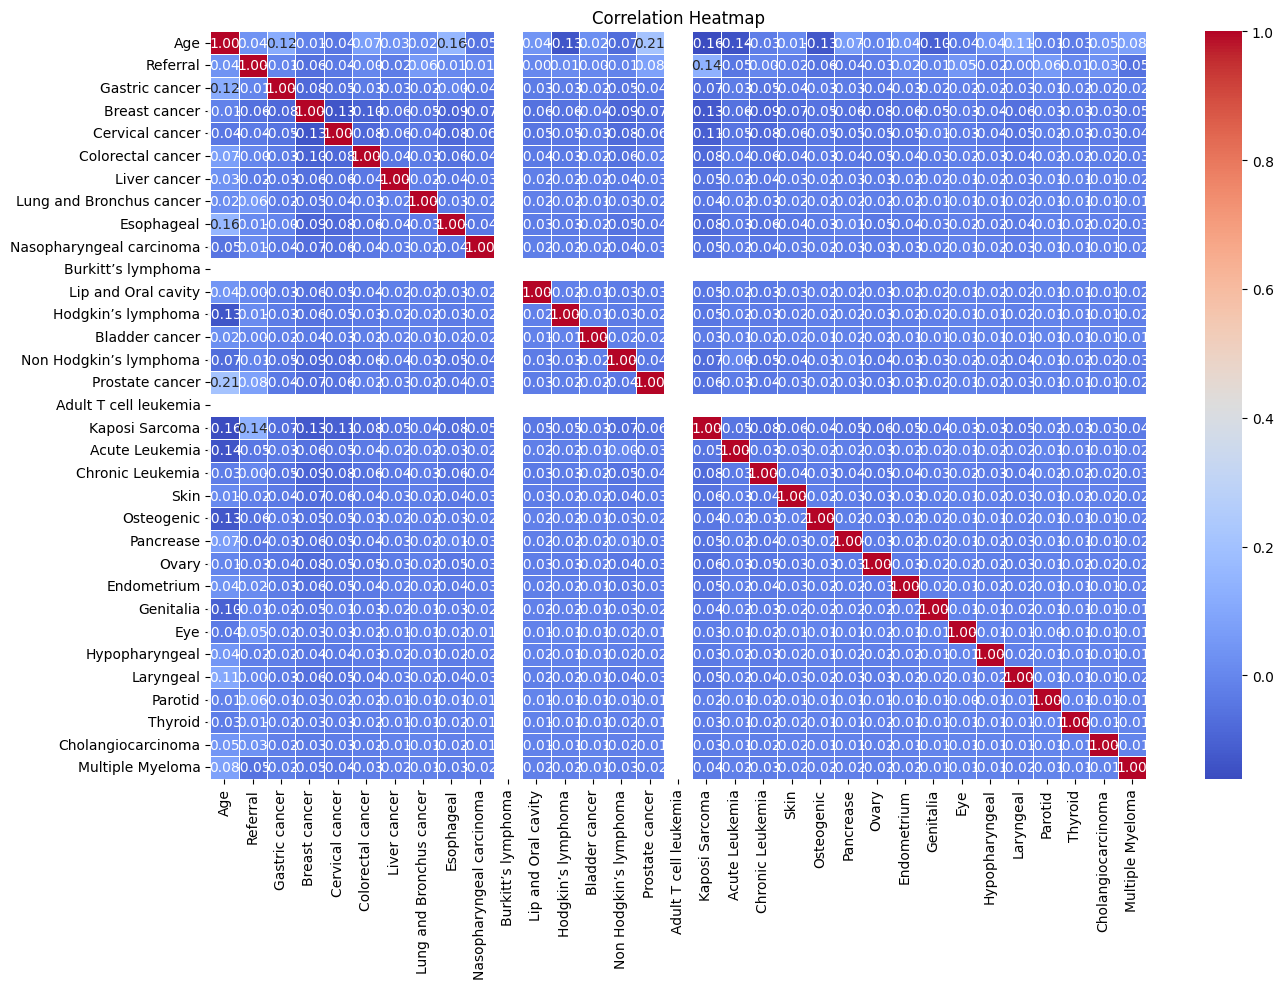

In [105]:
# Correlation heatmap for numerical columns
numerical_columns = ['Age', 'Referral'] + cancer_columns.tolist()
plt.figure(figsize=(14, 10))
corr_matrix = combined_df[numerical_columns].corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()


## **Cancer Type vs. Age Group**

<ipython-input-106-c0d43cf220bf>:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_cancers = combined_df.groupby('Age Group')[cancer_columns].sum()


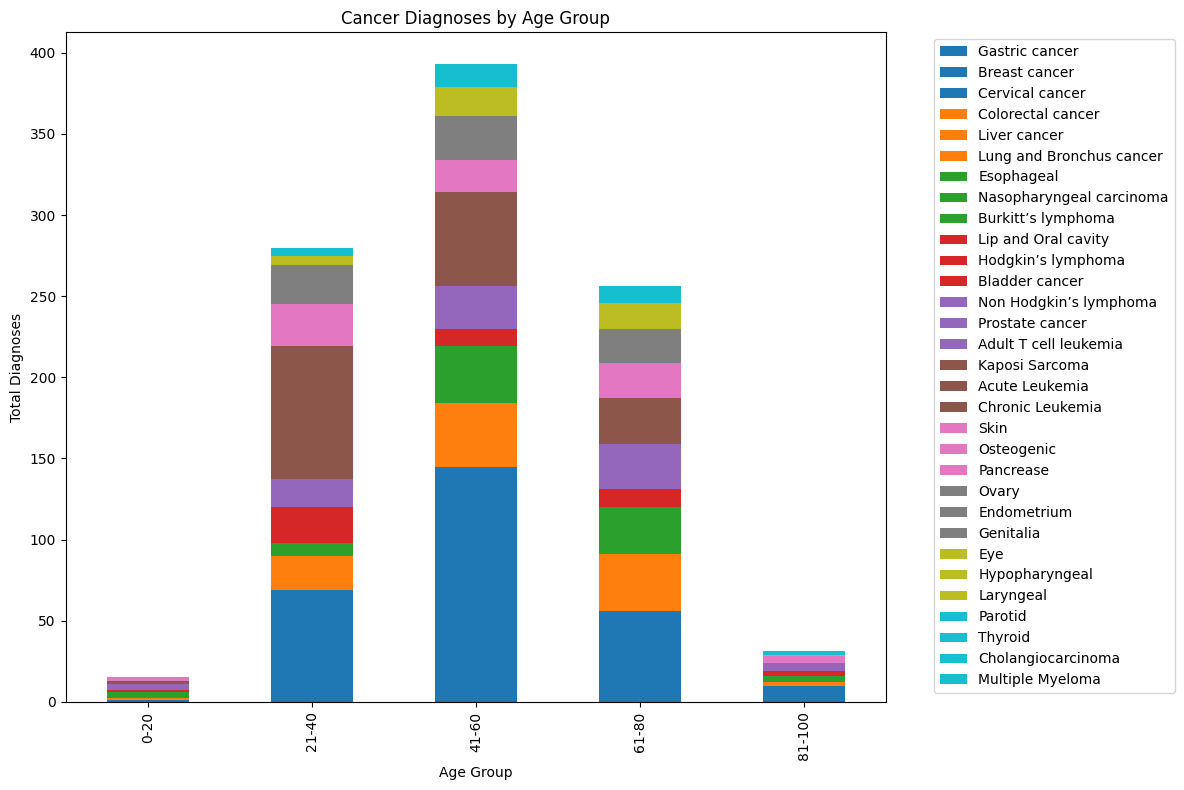

In [106]:
# Create age bins
bins = [0, 20, 40, 60, 80, 100]
labels = ['0-20', '21-40', '41-60', '61-80', '81-100']
combined_df['Age Group'] = pd.cut(combined_df['Age'], bins=bins, labels=labels, right=False)

# Cancer diagnoses by age group
age_group_cancers = combined_df.groupby('Age Group')[cancer_columns].sum()

# Plot cancer types by age group
age_group_cancers.plot(kind='bar', figsize=(12, 8), stacked=True, colormap='tab10')
plt.title('Cancer Diagnoses by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Total Diagnoses')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


## **investigating the outliers**

In [107]:
# Filter patients with zero total cancer diagnoses
no_diagnosis_df = combined_df[combined_df['Total_Cancers'] == 0].copy()

# Display summary of patients with no diagnoses
print(f"Number of patients with no cancer diagnoses: {no_diagnosis_df.shape[0]}")

# Check the distribution of other variables for patients with no diagnoses
print("Summary statistics for patients with no diagnoses:")
print(no_diagnosis_df.describe(include='all'))

# Examine unique values of categorical columns for these patients
categorical_columns = ['Sex', 'Province', 'Hospital', 'Referral', 'Residence']
for col in categorical_columns:
    print(f"Unique values in '{col}' for patients with no diagnoses:")
    print(no_diagnosis_df[col].unique(), "\n")

# Save patients with no cancer diagnoses for further analysis (optional)
no_diagnosis_df.to_excel('Patients_No_Diagnoses.xlsx', index=False)
print("Saved details of patients with no diagnoses to 'Patients_No_Diagnoses.xlsx'")
#we have seen that we have outliers as shown in the 'Patients_No_Diagnoses.xlsx' now our next step is to see how we can handle this outliers
#1)we have noticed most of them under col AO (Specify) they have a different kind of cancers that is not among the listed ones
#2)so what we will  first do is to rename the 2 colunms Called Specify so that we can be able to fix our problem---rename Specify_Cancer(AO) and Specify_technique
#3)we will list all the types of cancers on Specify_Cancer
#4)then after the colmn Multiple Myeloma we list them
#5)rerun to study our dataset then we will progress from there

# Step 1: Rename the relevant columns for clarity
specify_count = 0  # Counter to track occurrences of "Specify"

new_column_names = []
for col in combined_df.columns:
    if col == 'Specify':
        if specify_count == 0:
            new_column_names.append('Specify_Cancer')  # Rename the first occurrence
        elif specify_count == 1:
            new_column_names.append('Specify_Technique')  # Rename the second occurrence
        specify_count += 1
    else:
        new_column_names.append(col)  # Keep other columns unchanged

# Update the DataFrame's columns
combined_df.columns = new_column_names

# Step 2: Extract unique cancers from the 'Specify_Cancer' column
additional_cancers = combined_df['Specify_Cancer'].dropna().unique()

# Step 3: Check which cancers are not already listed as columns
existing_cancers = list(combined_df.columns)
new_cancer_columns = [cancer for cancer in additional_cancers if cancer not in existing_cancers]
# Step 4: Add new cancer columns to the dataframe
# Find the index of the 'Specify_Cancer' column
specify_cancer_index = combined_df.columns.get_loc('Specify_Cancer')


# Add new cancer columns immediately after 'Specify_Cancer'
for cancer in reversed(new_cancer_columns):  # Reverse the list to maintain order when inserting
    combined_df.insert(specify_cancer_index + 1, cancer, 0)  # Insert each new column


# Step 5: Update the new columns based on the 'Specify_Cancer' column
for index, row in combined_df.iterrows():
    if pd.notna(row['Specify_Cancer']):  # Check if 'Specify_Cancer' has a value
        cancer_type = row['Specify_Cancer']
        if cancer_type in combined_df.columns:
            combined_df.at[index, cancer_type] = 1  # Mark the presence of this cancer
#**********************now lets apply the same for the Specify_Technique******************************************

# Extract unique techniques from the 'Specify_Technique' column
additional_techniques = combined_df['Specify_Technique'].dropna().unique()

# Check which techniques are not already listed as columns
new_technique_columns = [technique for technique in additional_techniques if technique not in combined_df.columns]

# Find the index of the 'Specify_Technique' column
specify_technique_index = combined_df.columns.get_loc('Specify_Technique')

# Add new technique columns immediately after 'Specify_Technique'
for technique in reversed(new_technique_columns):  # Reverse the list to maintain order when inserting
    combined_df.insert(specify_technique_index + 1, technique, 0)  # Insert each new column

# Update the new technique columns based on the 'Specify_Technique' column
for index, row in combined_df.iterrows():
    if pd.notna(row['Specify_Technique']):  # Check if 'Specify_Technique' has a value
        technique_type = row['Specify_Technique']
        if technique_type in combined_df.columns:
            combined_df.at[index, technique_type] = 1  # Mark the presence of this technique
# Step 6:drop the 4 columns

# Drop the specified columns
columns_to_drop = ['Specify_Cancer', 'Specify_Technique', 'OTHERS', 'others']
combined_df.drop(columns=columns_to_drop, inplace=True, errors='ignore')  # Use errors='ignore' to avoid issues if columns are missing
# Step 7: Re-run analysis
no_diagnosis_df = combined_df[combined_df['Total_Cancers'] == 0].copy()

# Display updated statistics
print(f"Number of patients with no cancer diagnoses (after update): {no_diagnosis_df.shape[0]}")

# Save updated dataframe for review
combined_df.to_excel('Updated_Cancer_Dataset.xlsx', index=False)
print("Updated dataset saved as 'Updated_Cancer_Dataset.xlsx'")




# # Analyze distribution of 'Hospital', 'Sex', and 'Age' for these patients
# plt.figure(figsize=(10, 6))
# sns.countplot(data=no_diagnoses, x='Hospital', palette='Set2')
# plt.title('Distribution of Hospital for Patients with No Cancer Diagnoses')
# plt.xlabel('Hospital')
# plt.ylabel('Count')
# plt.tight_layout()
# plt.show()

# plt.figure(figsize=(10, 6))
# sns.countplot(data=no_diagnoses, x='Sex', palette='viridis')
# plt.title('Distribution of Sex for Patients with No Cancer Diagnoses')
# plt.xlabel('Sex')
# plt.ylabel('Count')
# plt.tight_layout()
# plt.show()

# plt.figure(figsize=(10, 6))
# sns.histplot(no_diagnoses['Age'], kde=True, bins=20, color='orange')
# plt.title('Age Distribution for Patients with No Cancer Diagnoses')
# plt.xlabel('Age')
# plt.ylabel('Frequency')
# plt.tight_layout()
# plt.show()


Number of patients with no cancer diagnoses: 35
Summary statistics for patients with no diagnoses:
       PatientID Hospital        Age  Sex Residence     Province  Referral  \
count         35       35  35.000000   35        35           35      35.0   
unique        35        2        NaN    2        25            6       2.0   
top     A046_KNH     MTRH        NaN    M    kiambu  Rift Valley       1.0   
freq           1       18        NaN   19         3           11      19.0   
mean         NaN      NaN  47.885714  NaN       NaN          NaN       NaN   
std          NaN      NaN  12.888142  NaN       NaN          NaN       NaN   
min          NaN      NaN  18.000000  NaN       NaN          NaN       NaN   
25%          NaN      NaN  40.000000  NaN       NaN          NaN       NaN   
50%          NaN      NaN  50.000000  NaN       NaN          NaN       NaN   
75%          NaN      NaN  56.000000  NaN       NaN          NaN       NaN   
max          NaN      NaN  68.000000  NaN  

In [107]:
#next now we need to  process and create our model in line with our objectives...so tommorrow we shall revisit our notes to make sure our implementation is inlign with objectives